# Comparing Logistic regression and Linear SVM models and scaling effect


In this notebook, the main objective is to understand the different models and compare their capabilities, we also look scaling and how applying it helps in certain machine learning models.

By the end of this notebook you should have:

- gained experience with building different models and ploting the results.
- a better understanding of scaling and how it affects different models.
- effect of regularization on different models.

### 1- By observing the data and without building a machine learning model, confirm if the data requires scaling or not, and explain how you came to a conclusion and confirm this with a plot.

## Step 1
### Importing packages
##### - Numpy packages are used to work on array
##### - Pandas packages are used for working on dataframes while fetching the data from csv and while creating features and target dataframe for Machine learning models.
##### - Matplotlib packages are used for plotting/visualing the data.

In [1]:
#Import standard packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing data
##### - using read_csv() function of pandas to fetch the data from our csv file into a dataframe.
##### - our dataset is of customer churn data of a telecom company, based on various characteristics we can predict whether the customer will leave or not

In [2]:
#https://www.kaggle.com/becksddf/churn-in-telecoms-dataset/data
#importing the dataset as dataframe
churn_data = pd.read_csv("customer_churn.csv")

#Top 5 records of dataset
churn_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


##### By observing the feature data, we are sure that the data will require scaling as one feature has very high values whereas comparitively the other feature has low value.
##### So the feature with high value might have a higher impact on our model then other one, in order to avoid this to happen we have to scale the feature data to normalize the values to a similar scale

#### Plotting the features distribution
##### - by plotting the features, we can understand the magnitude of each feature
##### - from plot we can observe, one feature has a high values compare to other two

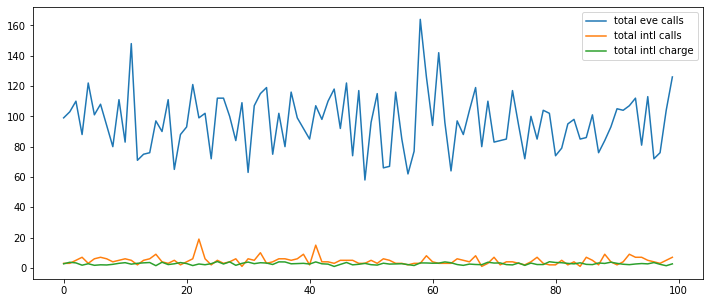

In [3]:
churn_data[:100].plot(y=['total eve calls','total intl calls', 'total intl charge'], figsize=(12,5))

## Creating feature and target data
##### Converting categorical variable into numeric

In [4]:
#importing LabelEncode from sklearn
from sklearn.preprocessing import LabelEncoder

#Creating label encoder object
le = LabelEncoder()

#fitting nd transforming categorical feature into label encoder
ip = le.fit_transform((churn_data[['international plan']].values.ravel()).astype('str'))
ip

#creating data frame after transformtion
df1 = pd.DataFrame(ip, columns = ["international plan"])
df1.head()

,international plan
0,0
1,0
2,0
3,1
4,1


#### Creating feature dataframe from the actual dataset

In [5]:
#data
df = churn_data[['number vmail messages','total day minutes','total day calls','total day charge','total eve calls','total eve charge','total night minutes','total night calls','total night charge','total intl minutes','total intl calls','total intl charge','customer service calls','churn']]

#concatinating data with categorical feature converted to numeric
df = pd.concat([df, df1], axis=1, sort=False)
df.head()


,number vmail messages,total day minutes,total day calls,total day charge,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan
0,25,265.1,110,45.07,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0
1,26,161.6,123,27.47,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0
2,0,243.4,114,41.38,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0
3,0,299.4,71,50.90,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,1
4,0,166.7,113,28.34,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,1


In [6]:
#creating feature data frame
X_df = df[['number vmail messages','total day minutes','total day calls','total day charge','total eve calls','total eve charge','total night minutes','total night calls','total night charge','total intl minutes','total intl calls','total intl charge','customer service calls','international plan']]
X_df.head()


,number vmail messages,total day minutes,total day calls,total day charge,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international plan
0,25,265.1,110,45.07,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,26,161.6,123,27.47,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,243.4,114,41.38,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,0,299.4,71,50.90,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1
4,0,166.7,113,28.34,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1


##### Creating target dataframe

In [7]:
#creating target dataframe
y = df[['churn']].astype(int)
y.head()

,churn
0,0
1,0
2,0
3,0
4,0


### 2- Split the data into 5% testing and 95% training data.

#### Splitting the data
##### train_test_split() method is used from sklearn package, model selection module which splits the features and target data into training and testing dataset. here, we are using the test_size as 0.05 which well set the test data percentage as 5%

In [8]:
#importing train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

#creating train and test dataset with train percentage as 0.05
X_train, X_test, y_train, y_test = train_test_split(X_df,y,random_state = 50,test_size=0.05,train_size=0.95)

### Calculating train and test percentages and shape

In [9]:
#Train accuracy percentage
print("Training data percentage is {:.2f}".format(len(X_train)/len(df)*100)+" %")
#Test accuracy percentage
print("Test data percentage is {:.2f}".format((len(X_test)/len(df))*100)+" %")

print("\n")

#Tain and test feature dataset shapes
print("Features train shape"+str(X_train.shape))
print("Features test shape"+str(X_test.shape))

print("\n")

#Tain and test target dataset shapes
print("Target train shape"+str(y_train.shape))
print("Target test shape"+str(y_test.shape))

Training data percentage is 94.99 %
Test data percentage is 5.01 %


Features train shape(3166, 14)
Features test shape(167, 14)


Target train shape(3166, 1)
Target test shape(167, 1)


### 3- Scale(MinMaxScaler) the data and save it into a scaled version of the data.

#### Scaling the data using MinMaxScaler
##### MinMaxScaler is being use to scale the data, it will normalize the data from 0 to 1, by calculating the scaled value of each feature using fromula  (X1 - Min)/(Max - Min)

In [10]:
#importing the MinMaxSclaer from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

#creating an object of MinMaxScaler
mms = MinMaxScaler()

#Fitting the training features
mms.fit(X_train)

#transforming the train features
X_train_scaled = mms.transform(X_train)
print(X_train_scaled[0])

print("\n\n")

#transforming the test features
X_test_scaled = mms.transform(X_test)
print(X_test_scaled[0])

[0.         0.65478905 0.78181818 0.6547619  0.61176471 0.92397282
 0.45615923 0.71428571 0.45666467 0.48       0.05       0.47962963
 0.11111111 0.        ]



[0.         0.69156214 0.41818182 0.69148223 0.68823529 0.57489486
 0.52850995 0.36842105 0.52898984 0.72       0.3        0.72037037
 0.22222222 0.        ]


# 4- Build a machine learning model for the original data and the scaled data using the following methods:
 #### - Logistic regression
 #### - Linear SVM.



## 1 Logistic regression
##### Logistic Regression is a model which use the logistic function such as sigmoid, which helps in classifying the data into two clases, here it uses probablity to determine the data belong to which class.
#### without scaling

In [11]:
#Building the model without sclaed features

#importing the LogisticRegression from sklearn.LinearModel
from sklearn.linear_model import LogisticRegression

#Crating an object of LogisticRegression
lr = LogisticRegression(random_state=654,n_jobs=-1)

#fitting the train data
lr.fit(X_train,y_train.values.ravel())


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=654, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### with scaling

In [12]:
#Creating an object for Logisitic regression for scaled vales
lr_sc = LogisticRegression(random_state=654,n_jobs=-1)

#fitting the scaled train data
lr_sc.fit(X_train_scaled,y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=654, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 2 SVM
##### We are using SVC which is Support Vector Classifier belongs to SVM, is a classifier whose objective is to fit the data which we provide and return a hyperplane that divide or classify the data into respective classes.
#### without scaling

In [13]:
#Building the model without sclaed features

#importing the Support vector classifier from sklearn.LinearModel
from sklearn.svm import SVC

#Crating an object of SVC
svc = SVC(random_state=654,kernel='linear')

#fitting the train data
svc.fit(X_train,y_train.values.ravel())


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=654, shrinking=True, tol=0.001,
    verbose=False)

#### with scaling

In [14]:
#Creating an object of svm for scaled data
svc_sc = SVC(random_state=654,kernel='linear')

#fitting the scaled train data
svc_sc.fit(X_train_scaled,y_train.values.ravel())


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=654, shrinking=True, tol=0.001,
    verbose=False)

#### 5- For the original data-set: calculate the accuracy of the testing and training data for each model, plot the accuracy of the models using a single plot. Explain why certain models achieved better accuracy for training or testing than the other model.



In [15]:
#predicting target for Logistic regression
y_pred_lr = lr.predict(X_test)
print(y_pred_lr[0:5])

#predicting target for svc
y_pred_svc = svc.predict(X_test)
print(y_pred_svc[0:5])

[0 0 0 1 0]
[0 0 0 0 0]


In [16]:
#importing accuracy_score from sklearn.metrics
#The accuracy score which helps in calculating the train and test accuracy based on the number of correctly classified data
from sklearn.metrics import accuracy_score

#calculating train accuracy for without scaled data for logistic regression
train_lr_accuracy = lr.score(X_train,y_train)
print("Train accuracy of Logistic regression {:.2f}".format(train_lr_accuracy*100)+"%")

#calculating test accuracy for without scaled data for logistic regression
test_lr_accuracy = accuracy_score(y_test,y_pred_lr)
print("Test accuracy of Logistic regression {:.2f}".format(test_lr_accuracy*100)+"%")


#calculating train accuracy for without scaled data for SVC
train_svc_accuracy = svc.score(X_train,y_train)
print("\nTrain accuracy of SVC {:.2f}".format(train_svc_accuracy*100)+"%")

#calculating test accuracy for without scaled data for SVC
test_svc_accuracy = accuracy_score(y_test,y_pred_svc)
print("Test accuracy of SVC {:.2f}".format(test_svc_accuracy*100)+"%")

Train accuracy of Logistic regression 85.41%
Test accuracy of Logistic regression 80.84%

Train accuracy of SVC 85.75%
Test accuracy of SVC 80.84%


In [17]:
label = ['Logistic Regression','SVC']
print(label)

train_acc = [round(train_lr_accuracy*100,2),round(train_svc_accuracy*100,2)]
print(train_acc)

test_acc = [round(test_lr_accuracy*100,2),round(test_svc_accuracy*100,2)]
print(test_acc)

['Logistic Regression', 'SVC']
[85.41, 85.75]
[80.84, 80.84]


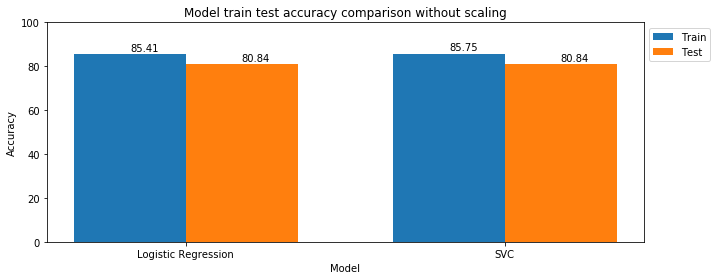

In [19]:
x = np.arange(len(label))  
width = 0.35  

#fig= plt.figure(figsize=(10,4))
fig, ax = plt.subplots(figsize=(10, 4))
bar1 = ax.bar(x - width/2, train_acc, width, label='Train')
bar2 = ax.bar(x + width/2, test_acc, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Model')
ax.set_title('Model train test accuracy comparison without scaling')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.set_ylim([0, 100])
ax.legend(loc='center right', bbox_to_anchor=(1.12, 0.9))


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        #print(height)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points")


autolabel(bar1)
autolabel(bar2)

fig.tight_layout()

plt.show()

- Here SVC is achieving higer accuracy as compared to Logistic Regression, as in SVC it classifies the data by building a hyperplane which helps us in distinguishing our classes, it also handles outliers while creating the hyperplane so it performs better compare to Logistic Regression which works on the probability of the data.

#### 6- For the scaled data-sets: calculate the accuracy of the testing data for each model, plot the accuracy of the models using a single plot.



In [20]:
#predicting target for sclaed data for Logistic regression
y_pred_lr_scaled = lr_sc.predict(X_test_scaled)
print(y_pred_lr[0:5])

#predicting target for scaled data for SVC
y_pred_svc_scaled = svc_sc.predict(X_test_scaled)
print(y_pred_svc[0:5])

[0 0 0 1 0]
[0 0 0 0 0]


In [21]:
#importing accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

#calculating train accuracy for with scaled data for logistic regression
train_lr_accuracy_scaled = lr_sc.score(X_train_scaled,y_train)
print("Train accuracy of Logistic regression after scaling is {:.2f}".format(train_lr_accuracy_scaled*100)+"%")

#calculating train accuracy for with scaled data for logistic regression
test_lr_accuracy_scaled = accuracy_score(y_test,y_pred_lr_scaled)
print("Test accuracy of Logistic regression after scaling is {:.2f}".format(test_lr_accuracy_scaled*100)+"%")


#calculating train accuracy for with scaled data for SVC
train_svc_accuracy_scaled = svc_sc.score(X_train_scaled,y_train)
print("\nTrain accuracy of SVC after scaling is {:.2f}".format(train_svc_accuracy_scaled*100)+"%")

#calculating train accuracy for with scaled data for SVC
test_svc_accuracy_scaled = accuracy_score(y_test,y_pred_svc_scaled)
print("Test accuracy of SVC after scaling is {:.2f}".format(test_svc_accuracy_scaled*100)+"%")

Train accuracy of Logistic regression after scaling is 86.36%
Test accuracy of Logistic regression after scaling is 83.83%

Train accuracy of SVC after scaling is 85.75%
Test accuracy of SVC after scaling is 80.84%


In [22]:
label = ['Logistic Regression','SVC']
print(label)

train_acc_scaled = [round(train_lr_accuracy_scaled*100,2),round(train_svc_accuracy_scaled*100,2)]
print(train_acc_scaled)

test_acc_scaled = [round(test_lr_accuracy_scaled*100,2),round(test_svc_accuracy_scaled*100,2)]
print(test_acc_scaled)

['Logistic Regression', 'SVC']
[86.36, 85.75]
[83.83, 80.84]


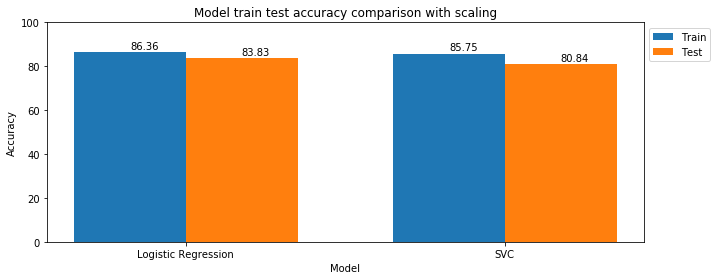

In [23]:
x = np.arange(len(label))  
width = 0.35  

#fig= plt.figure(figsize=(10,4))
fig, ax = plt.subplots(figsize=(10, 4))
bar1 = ax.bar(x - width/2, train_acc_scaled, width, label='Train')
bar2 = ax.bar(x + width/2, test_acc_scaled, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Model')
ax.set_title('Model train test accuracy comparison with scaling')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.set_ylim([0, 100])
ax.legend(loc='center right', bbox_to_anchor=(1.12, 0.9))


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        #print(height)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points")


autolabel(bar1)
autolabel(bar2)

fig.tight_layout()

plt.show()

#### 7- Any improvement in accuracy of the testing data because of the scaling? Explain your findings.

- There has been a small increase in the accuracy in case of logistic regression, where as for SVC the accuracies are same

#### 8- Use a for loop to check the accuracies for C = 0.001, 1.0, 1000 for each model. Explain your observations.

#### For loop of C values without scaling for Logistic Regression

In [24]:
#creating a list of C values
c = [0.001,1.0,1000]

#creating train and test accuracies list
train_accuracies_lr =[]
test_accuracies_lr =[]

#looping for all c values
for i in c:
    print(i)
    
    #Building the model without sclaed features
    
    #Creting an object of Logistic Regression
    lr = LogisticRegression(random_state=654,n_jobs=-1,C=i)
    
    #fitting the train data
    lr.fit(X_train,y_train.values.ravel())
    
    #predicting target
    y_pred_lr = lr.predict(X_test)
    
    #calculating train accuracy
    train_acc_lr = lr.score(X_train,y_train)
    print("For c = {:.3f} Train accuracy is {:.2f}".format(i,train_acc_lr*100)+"%")
    #appending train accuracy to list
    train_accuracies_lr.append(round(train_acc_lr*100,2))
    
    #calculating test accuracy
    test_acc_lr = accuracy_score(y_test,y_pred_lr)
    print("For c = {:.3f} Test accuracy is {:.2f}".format(i,test_acc_lr*100)+"% \n")
    #appending test accuracy to list
    test_accuracies_lr.append(round(test_acc_lr*100,2))

0.001
For c = 0.001 Train accuracy is 85.94%
For c = 0.001 Test accuracy is 80.84% 

1.0
For c = 1.000 Train accuracy is 85.41%
For c = 1.000 Test accuracy is 80.84% 

1000
For c = 1000.000 Train accuracy is 85.47%
For c = 1000.000 Test accuracy is 80.84% 



In [25]:
print(c)
print(train_accuracies_lr)
print(test_accuracies_lr)

[0.001, 1.0, 1000]
[85.94, 85.41, 85.47]
[80.84, 80.84, 80.84]


### Plotting the train and test accuracies for each C value without scaled data for Logistic Regression

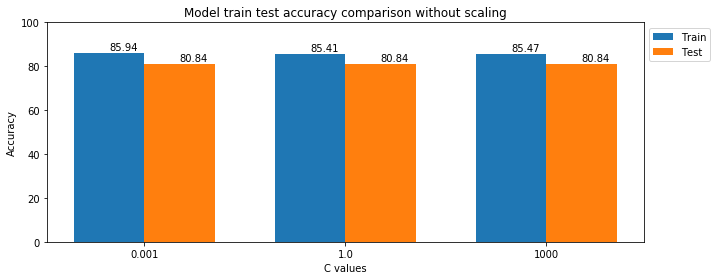

In [26]:
x = np.arange(len(c))  
width = 0.35  

#fig= plt.figure(figsize=(10,4))
fig, ax = plt.subplots(figsize=(10, 4))
bar1 = ax.bar(x - width/2, train_accuracies_lr, width, label='Train')
bar2 = ax.bar(x + width/2, test_accuracies_lr, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('C values')
ax.set_title('Model train test accuracy comparison without scaling')
ax.set_xticks(x)
ax.set_xticklabels(c)
ax.set_ylim([0, 100])
ax.legend(loc='center right', bbox_to_anchor=(1.12, 0.9))


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        #print(height)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points")


autolabel(bar1)
autolabel(bar2)

fig.tight_layout()

plt.show()

- From the plot for Logistic Regression for without scaled data for each C values, as the C value increases from 0.001 → 1 → 1000 , the train accuracy decreases from 85.94 → 85.41 but again with increse of C to 1000 a slight increase is being observed, whereas the test accuracies remain same for all.

### For loop of C values with scaling for Logistic Regression

In [27]:
#creating a list of C values
c = [0.001,1.0,1000]

#creating train and test accuracies list
train_scaled_accuracies_lr =[]
test_scaled_accuracies_lr =[]

#looping for all c values
for i in c:
    print(i)
    
    #Building the model without sclaed features
    
    #Creting an object of Logistic Regression
    lr_sc = LogisticRegression(random_state=654,n_jobs=-1,C=i)
    
    #fitting the train data
    lr_sc.fit(X_train_scaled,y_train.values.ravel())
    
    #predicting target
    y_pred__scaledlr = lr_sc.predict(X_test_scaled)
    
    #calculating train accuracy
    train_acc_lr_scaled = lr_sc.score(X_train_scaled,y_train)
    print("For c = {:.3f} Train accuracy is {:.2f}".format(i,train_acc_lr_scaled*100)+"%")
    #appending train accuracy to list
    train_scaled_accuracies_lr.append(round(train_acc_lr_scaled*100,2))
    
    #calculating test accuracy
    test_acc_lr_scaled = accuracy_score(y_test,y_pred_lr)
    print("For c = {:.3f} Test accuracy is {:.2f}".format(i,test_acc_lr_scaled*100)+"% \n")
    #appending test accuracy to list
    test_scaled_accuracies_lr.append(round(test_acc_lr_scaled*100,2))

0.001
For c = 0.001 Train accuracy is 85.75%
For c = 0.001 Test accuracy is 80.84% 

1.0
For c = 1.000 Train accuracy is 86.36%
For c = 1.000 Test accuracy is 80.84% 

1000
For c = 1000.000 Train accuracy is 86.39%
For c = 1000.000 Test accuracy is 80.84% 



In [28]:
print(c)
print(train_scaled_accuracies_lr)
print(test_scaled_accuracies_lr)

[0.001, 1.0, 1000]
[85.75, 86.36, 86.39]
[80.84, 80.84, 80.84]


### Plotting the train and test accuracies with scaled data for Logistic Regression

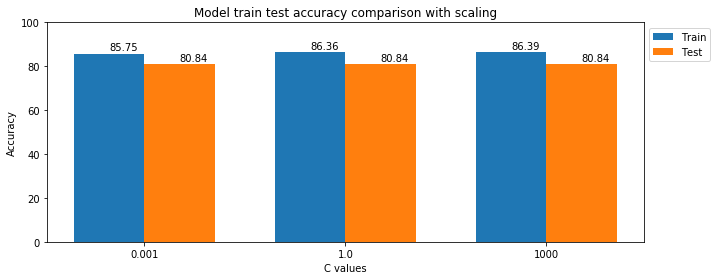

In [29]:
x = np.arange(len(c))  
width = 0.35  

#fig= plt.figure(figsize=(10,4))
fig, ax = plt.subplots(figsize=(10, 4))
bar1 = ax.bar(x - width/2, train_scaled_accuracies_lr, width, label='Train')
bar2 = ax.bar(x + width/2, test_scaled_accuracies_lr, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('C values')
ax.set_title('Model train test accuracy comparison with scaling')
ax.set_xticks(x)
ax.set_xticklabels(c)
ax.set_ylim([0, 100])
ax.legend(loc='center right', bbox_to_anchor=(1.12, 0.9))


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        #print(height)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points")


autolabel(bar1)
autolabel(bar2)

fig.tight_layout()

plt.show()

- From the plot for Logistic Regression for with scaled data for each C values, as the C value increases from 0.001 → 1 → 1000 , the train accuracy is also increasing slightly, whereas the test accuracies remain same for all.

#### For loop of C values without scaling for svc

In [19]:
#creating a list of C values
c = [0.001,1.0,1000]

#creating train and test accuracies list
train_accuracies =[]
test_accuracies =[]

#looping for all c values
for i in c:
    print(i)
    
    #Building the model without sclaed features
    
    #Creting an object of SVC
    svc = SVC(random_state=654,kernel='linear',C=i)
    
    #fitting the train data
    svc.fit(X_train,y_train.values.ravel())
    
    #predicting target
    y_pred_c = svc.predict(X_test)
    
    #calculating train accuracy
    train_acc_svc_c = svc.score(X_train,y_train)
    print("For c = {:.3f} Train accuracy is {:.2f}".format(i,train_acc_svc_c*100)+"%")
    #appending train accuracy to list
    train_accuracies.append(round(train_acc_svc_c*100,2))
    
    #calculating test accuracy
    test_acc_svc_c = accuracy_score(y_test,y_pred_c)
    print("For c = {:.3f} Test accuracy is {:.2f}".format(i,test_acc_svc_c*100)+"% \n")
    #appending test accuracy to list
    test_accuracies.append(round(test_acc_svc_c*100,2))
    


0.001
For c = 0.001 Train accuracy is 85.75%
For c = 0.001 Test accuracy is 80.84% 

1.0
For c = 1.000 Train accuracy is 85.75%
For c = 1.000 Test accuracy is 80.84% 

1000
For c = 1000.000 Train accuracy is 86.54%
For c = 1000.000 Test accuracy is 83.83% 



In [20]:
print(c)
print(train_accuracies)
print(test_accuracies)

[0.001, 1.0, 1000]
[85.75, 85.75, 86.54]
[80.84, 80.84, 83.83]


### Plotting the train and test accuracies without scaled data for SVC

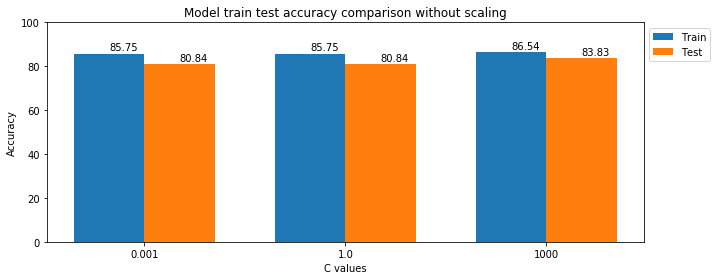

In [22]:
x = np.arange(len(c))  
width = 0.35  

#fig= plt.figure(figsize=(10,4))
fig, ax = plt.subplots(figsize=(10, 4))
bar1 = ax.bar(x - width/2, train_accuracies, width, label='Train')
bar2 = ax.bar(x + width/2, test_accuracies, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('C values')
ax.set_title('Model train test accuracy comparison without scaling')
ax.set_xticks(x)
ax.set_xticklabels(c)
ax.set_ylim([0, 100])
ax.legend(loc='center right', bbox_to_anchor=(1.12, 0.9))


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        #print(height)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points")


autolabel(bar1)
autolabel(bar2)

fig.tight_layout()

plt.show()

- From the plot for SVC for without scaled data for each C values, as the C value increases from 0.001 → 1 → 1000 , the train accuracy reamins same for C = 0.001 & 1.0 and it increases slightly for C = 1000 , also the same pattern is being observed for test accuracies.

##### For loop of C values with scaled data for SVC

In [30]:
c = [0.001,1.0,1000]

train_accuracy_scaled =[]
test_accuracy_scaled =[]

for i in c:
    print(i)
    
    #Building the model without sclaed features
    
    #Creting an object of SVC
    svc_sc = SVC(random_state=654,kernel='linear',C=i)
    
    #fitting the train data
    svc_sc.fit(X_train_scaled,y_train.values.ravel())
    
    #predicting target values with scaled data
    y_pred_c_scaled = svc.predict(X_test_scaled)
    
    #train accuracy for scaled data
    train_acc_svc_c_sc = svc.score(X_train_scaled,y_train)
    print("For c = {:.3f} Train accuracy is {:.2f}".format(i,train_acc_svc_c_sc*100)+"%")
    #appending train accuracy to list
    train_accuracy_scaled.append(round(train_acc_svc_c_sc*100,2))
    
    #test accuracy for scaled data
    test_acc_svc_c_sc = accuracy_score(y_test,y_pred_c_scaled)
    print("For c = {:.4f} Test accuracy is {:.2f}".format(i,test_acc_svc_c_sc*100)+"% \n")
    #appending test accuracy to list
    test_accuracy_scaled.append(round(test_acc_svc_c_sc*100,2))
    


0.001
For c = 0.001 Train accuracy is 85.75%
For c = 0.0010 Test accuracy is 80.84% 

1.0
For c = 1.000 Train accuracy is 85.75%
For c = 1.0000 Test accuracy is 80.84% 

1000
For c = 1000.000 Train accuracy is 85.75%
For c = 1000.0000 Test accuracy is 80.84% 



In [31]:
print(c)
print(train_accuracy_scaled)
print(test_accuracy_scaled)

[0.001, 1.0, 1000]
[85.75, 85.75, 85.75]
[80.84, 80.84, 80.84]


#### Plotting the train and test accuracies with scaled data for SVC

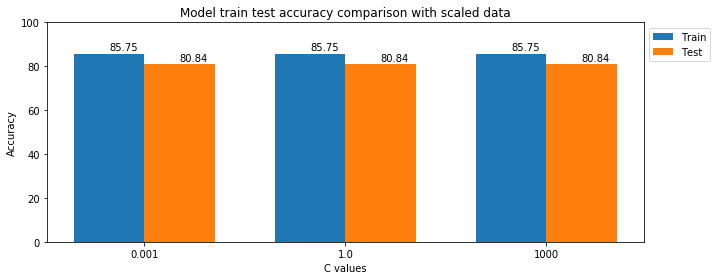

In [32]:
x = np.arange(len(c))  
width = 0.35  

#fig= plt.figure(figsize=(10,4))
fig, ax = plt.subplots(figsize=(10, 4))
bar1 = ax.bar(x - width/2, train_accuracy_scaled, width, label='Train')
bar2 = ax.bar(x + width/2, test_accuracy_scaled, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('C values')
ax.set_title('Model train test accuracy comparison with scaled data')
ax.set_xticks(x)
ax.set_xticklabels(c)
ax.set_ylim([0, 100])
ax.legend(loc='center right', bbox_to_anchor=(1.12, 0.9))


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        #print(height)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points")


autolabel(bar1)
autolabel(bar2)

fig.tight_layout()

plt.show()

- From the plot for SVC for with scaled data for each C values, as the C value increases from 0.001 → 1 → 1000 , the train and the test accuracies remains same.

### Classification report and confusion matrix for SVC without scaled data
- Classification report will gives the metric details like precision, recall, f1 score and confusion metrics will give us information about hou much true positives, true negatives, false positives, and false negatives are there.

In [40]:
y_pred_c = svc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

#finding the classification report
results =  classification_report(y_test,y_pred_c, zero_division=0)
print(results)

#printing confusion matrix
cnf =  confusion_matrix(y_test,y_pred_c)
print(cnf)

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       135
           1       0.00      0.00      0.00        32

    accuracy                           0.81       167
   macro avg       0.40      0.50      0.45       167
weighted avg       0.65      0.81      0.72       167

[[135   0]
 [ 32   0]]


#### Classification report and confusion matrix for SVC with scaled data


In [39]:
y_pred_c_scaled = svc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

#finding the classification report
results =  classification_report(y_test,y_pred_c_scaled, zero_division=0)
print(results)

#printing confusion matrix
cnf =  confusion_matrix(y_test,y_pred_c_scaled)
print(cnf)


              precision    recall  f1-score   support

           0       0.81      1.00      0.89       135
           1       0.00      0.00      0.00        32

    accuracy                           0.81       167
   macro avg       0.40      0.50      0.45       167
weighted avg       0.65      0.81      0.72       167

[[135   0]
 [ 32   0]]


##### References:

https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
https://datascience.stackexchange.com/questions/25596/how-to-plot-two-columns-of-single-dataframe-on-y-axis